## Masking: 
In some cases we are only interested in a certain part of an image. In such cases, we need a way to get rid of the irrevelant parts of the image. Applying a mask would set irrevelant pixels to a certain value, so we can focus on objects of interest only.

In [1]:
#import necessary libraries:
import numpy as np
import skimage.io
import skimage.draw
import matplotlib.pyplot as plt

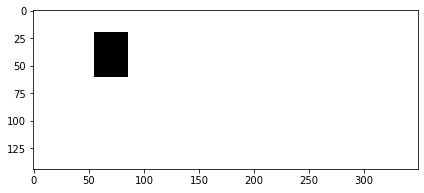

In [2]:
image = skimage.io.imread('land.jpg')
#Create the basic mask with the same shape as our land image (no channels)
mask = np.ones(shape=image.shape[0:2])
#Create a mask that extends from 55 to 85 on the x axis and
# from 20 to 60 on the y axis.
rr, cc = skimage.draw.rectangle(start=(20,55), end=(60, 85))
#The mask will be black, so assign a value of 0
mask[rr,cc]=0
skimage.io.imshow(mask)

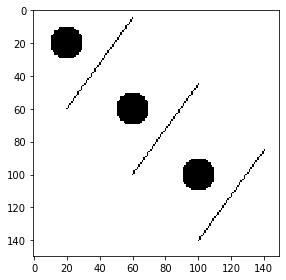

In [3]:
#Creating a few circle and line masks: 
masked_image= np.ones(shape=(150, 150))
for i in range(3):
    rr,cc = skimage.draw.disk((20+(i*40), 20+(i*40)), 10)
    lr, lc = skimage.draw.line(60+40*i, 20+40*i, 5+40*i, 60+40*i)
    masked_image[rr,cc] = 0
    masked_image[lr, lc] = 0
skimage.io.imshow(masked_image)

## Exercise: Masking images
In the following section, we will apply masks to images to highlight the objects we are interested in. 

The first image shows a bird fishing in a no-fishing area. First, we will show just the bird and black out the rest of the image and then show just the no-fishing sign and ignore the rest.

The second image displays many whole and partial hamburgers. We will show just the whole ones. 

(-0.5, 250.5, 200.5, -0.5)

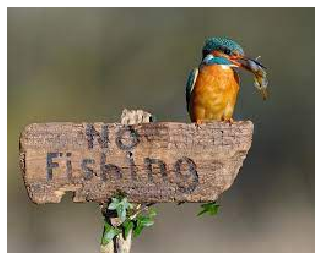

In [4]:
bird = skimage.io.imread('no_fishing.jpg')
skimage.io.imshow(bird)
plt.axis('off')

(-0.5, 250.5, 200.5, -0.5)

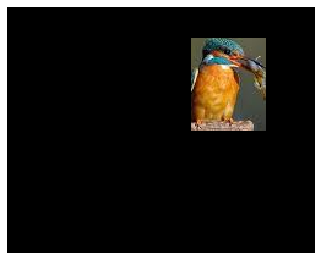

In [5]:
#Creating the bird only mask:
bird_mask = np.ones(shape=bird.shape[:2], dtype=bool)
#Draw a rectangle where the image will be shown through
rr, cc = skimage.draw.rectangle(start=(25, 150), end=(100, 210))
bird_mask[rr,cc] = False
#Make a copy of the original image
bird_only = bird.copy()
bird_only[bird_mask]=0
skimage.io.imshow(bird_only)
plt.axis('off')

(-0.5, 250.5, 200.5, -0.5)

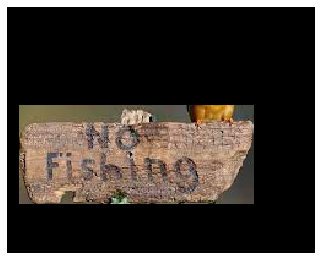

In [6]:
#Creating no-fishing mask:
no_fishing_mask = np.ones(shape=bird.shape[:2], dtype=bool)
#Draw the rectangle where the sign will be shown through
rr,cc = skimage.draw.rectangle(start=(80, 10), end=(160, 200))
no_fishing_mask[rr,cc]=False
no_fishing_sign = bird.copy()
no_fishing_sign[no_fishing_mask]=0
skimage.io.imshow(no_fishing_sign)
plt.axis('off')

Now let us shift our focus to applying masks to repetitive objects. Our image consists of many half and whole hamburgers. We will select only the whole hamburgers by applying a mask:

(-0.5, 508.5, 338.5, -0.5)

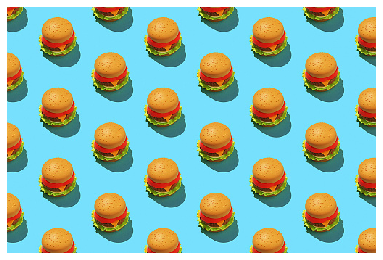

In [7]:
hamburger = skimage.io.imread('hamburger.jpg')
skimage.io.imshow(hamburger)
plt.axis('off')

(-0.5, 508.5, 338.5, -0.5)

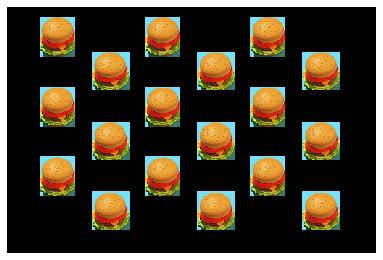

In [8]:
#Create the mask with the same shape as the image
mask = np.ones(shape=hamburger.shape[:2], dtype=bool)
for j in range(3):
    for i in range(3):
        rr, cc = skimage.draw.rectangle(start=(14+j*96,45+i*145), end=(68+j*96,93+i*145))
        rr_, cc_ = skimage.draw.rectangle(start=(62+j*96, 117+i*145), end=(114+j*96, 168+i*145))
        mask[rr,cc]=False
        mask[rr_,cc_]=False
        hamburger_masked = hamburger.copy()
        hamburger_masked[mask]=1
skimage.io.imshow(hamburger_masked)
plt.axis('off')

In this part of the tutorial we learned how to mask certain parts of the images.